In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('standard_marketing_campaign.csv')
df.sample(5)

,Recency,Frequency,Monetary
464,1.274814,0.600013,-0.075878
1793,1.240283,-0.618546,-0.682682
1444,-0.314658,1.354992,1.513825
1172,-0.694787,0.700252,3.170695
1450,-1.144012,1.765270,2.972581


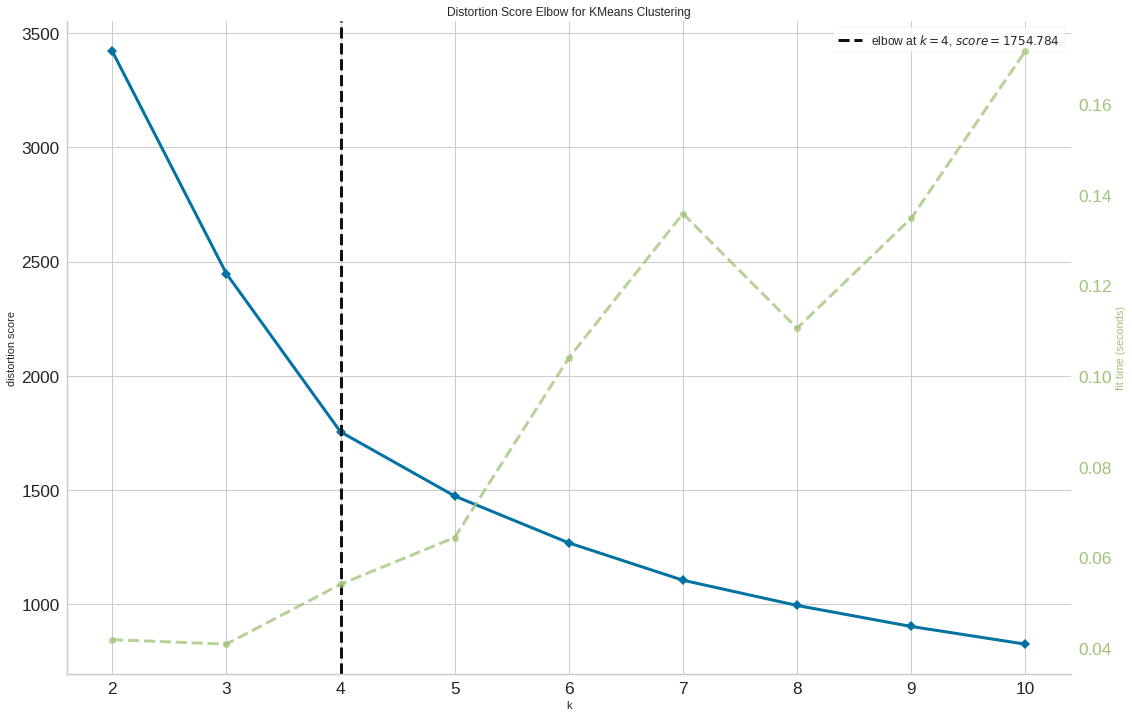

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

In [ ]:
cluster = KMeans(n_clusters=4, random_state=0).fit(df)

df['segment'] = cluster.labels_
df

,Recency,Frequency,Monetary,segment
0,0.307341,1.220083,1.599462,2
1,-0.383789,-1.167420,-0.956309,1
2,-0.798417,1.043752,0.275266,3
3,-0.798440,-0.900752,-0.918679,1
4,1.551248,0.206481,-0.324553,0
...,...,...,...,...
2224,-0.107332,0.441836,1.172991,3
2225,0.238171,0.298901,-0.190736,0
2226,1.447582,0.781458,1.171992,2
2227,-1.420417,1.201032,0.389028,3


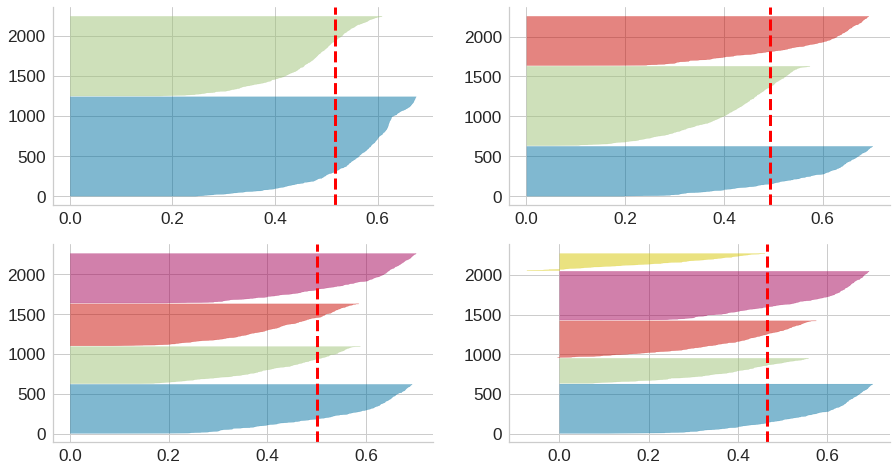

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

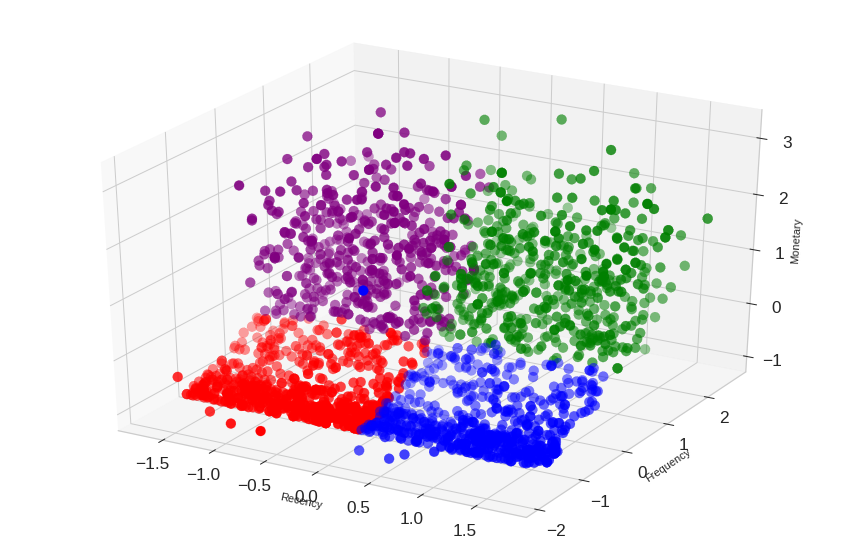

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Recency'][df.segment == 0], df['Frequency']
           [df.segment == 0], df['Monetary'][df.segment == 0], 
           c='blue', s=100, edgecolor='blue',linestyle='--')

ax.scatter(df['Recency'][df.segment == 1], df['Frequency']
           [df.segment == 1], df['Monetary'][df.segment == 1], 
           c='red', s=100, edgecolor='red',linestyle='--')


ax.scatter(df['Recency'][df.segment == 2], df['Frequency']
           [df.segment == 2], df['Monetary'][df.segment == 2], 
           c='green', s=100, edgecolor='green',linestyle='--')

ax.scatter(df['Recency'][df.segment == 3], df['Frequency']
           [df.segment == 3], df['Monetary'][df.segment == 3], 
           c='purple', s=100, edgecolor='purple',linestyle='--')

plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()